In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [10]:
data=pd.read_csv(r"C:\Users\Harsh Pratap Singh\Downloads\winequality-white.csv",sep=';')

In [11]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [12]:
y=data['quality']
x=data.drop("quality",axis=1)

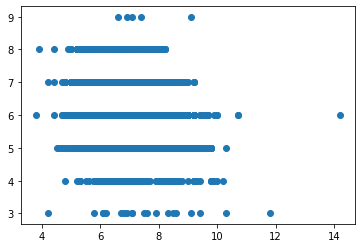

In [13]:
x.head()
plt.scatter(x['fixed acidity'],y)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
scl=StandardScaler()
x_train=scl.fit_transform(x_train)
x_test=scl.transform(x_test)

In [16]:
lasso=LassoCV()
rnf=RandomForestRegressor(min_samples_split=40)
rnf.fit(x_train,y_train)
lasso.fit(x_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [17]:
test_pred=lasso.predict(x_test)
train_pred=lasso.predict(x_train)

In [18]:
pred=np.round(test_pred)
tpred=np.round(train_pred)

In [19]:
lasso.score(x_test,pred)

0.7003608980114773

In [20]:
#LassoCV
test_rmse = mean_squared_error(pred, y_test) ** 0.5
print(test_rmse)

0.870139561876632


In [21]:
#Random Forest regressor
train_rmse= mean_squared_error(tpred, y_train) ** 0.5
print(train_rmse)

0.7915776662043255


In [22]:
#Linear Regression
lin=LinearRegression()
lin.fit(x_train,y_train)
predd=lin.predict(x_test)
pr=np.round(pred)

In [23]:
#SCORE FOR TEST
lin.score(x_test,pr)

0.7006094840398428

In [25]:
#RMSE
rm=mean_squared_error(pr, y_test) ** 0.5
print(rm)

0.870139561876632


In [29]:
#Elastic net 
elasticNet = ElasticNetCV(max_iter = 50000, cv = 10)
elasticNet.fit(x_train, y_train)
predd=elasticNet.predict(x_test)
pr=np.round(pred)

In [30]:
#SCORE FOR TEST
elasticNet.score(x_test,pr)

0.7001405869590134

In [28]:
#RMSE
rm=mean_squared_error(pr, y_test) ** 0.5
print(rm)

0.870139561876632


In [32]:
ridge = RidgeCV()
ridge.fit(x_train, y_train)
predd=ridge.predict(x_test)
pr=np.round(pred)


In [34]:
#SCORE FOR TEST
ridge.score(x_test,pr)

0.7005778327720857

In [35]:
#RMSE
rm=mean_squared_error(pr, y_test) ** 0.5
print(rm)

0.870139561876632
